# Predicting the survival of Titanic passengers

Taken from Datacamp Tutorial
https://goo.gl/53waiX 

When the Titanic sank, 1502 of the 2224 passengers and crew got killed. One of the main reasons for this high level of casualties was the lack of lifeboats on this supposedly unsinkable ship.Those that have seen the movie know that some individuals were more likely to survive the sinking (lucky Rose) than others (poor Jack). 

In the exercise, you wil apply machine learning techniques to predict a passenger's chance of surviving using Python.

## Kaggle

This example is famous, because Kaggle ran a competition with it. In 2010, Kaggle (https://www.kaggle.com/) was founded as a platform for predictive modelling and analytics competitions on which companies and researchers post their data and statisticians and data miners from all over the world compete to produce the best models. This crowdsourcing approach relies on the fact that there are countless strategies that can be applied to any predictive modelling task and it is impossible to know at the outset which technique or analyst will be most effective. Kaggle also hosts recruiting competitions in which data scientists compete for a chance to interview at leading data science companies like Facebook, Winton Capital, and Walmart. (https://en.wikipedia.org/wiki/Kaggle)

As data scienc Blogger Trevor Stephens writes: "So you’re excited to get into prediction and like the look of Kaggle’s excellent getting started competition, Titanic: Machine Learning from Disaster? Great! It’s a wonderful entry-point to machine learning with a manageably small but very interesting dataset with easily understood variables. In this competition, you must predict the fate of the passengers aboard the RMS Titanic, which famously sank in the Atlantic ocean during its maiden voyage from the UK to New York City after colliding with an iceberg." (http://trevorstephens.com/kaggle-titanic-tutorial/getting-started-with-r/)

Following the Kaggle competition, we need to import the training data first.

In [1]:
import pandas as pd

train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url)

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url)

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Data exploration

Passengers that survived vs passengers that passed away:

In [6]:
from collections import Counter

print(Counter(train['Survived']))

Counter({0: 549, 1: 342})


Males and females that survived vs males and females that passed away:

In [7]:
males = train.loc[train['Sex'] == 'male']
print('Males:',Counter(males['Survived']))
      
females = train.loc[train['Sex'] == 'female']
print('Females:',Counter(females['Survived']))

Males: Counter({0: 468, 1: 109})
Females: Counter({1: 233, 0: 81})


## Data preparation/cleaning

Next we create the additional column child, and indicate whether child or no child

We have to do the same for sex, let's say maile is 0 and female is 1

And to Embarked, S is 0 and C is 1


In [8]:
import numpy as np

train['Child'] = np.where(train['Age'] <18.0, 1, 0)
train['Sex'] = np.where(train['Sex'] == 'female', 1, 0)
train['Embarked'] = np.where(train['Embarked'] == 'C', 1, 0)


## Modelling

We will use a decision tree to find features that help with the survival of Titanic passengers.

Decision trees build classification models in the form of a tree structure. They break down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. (http://www.saedsayad.com/decision_tree.htm).

So, we will automatically build something like this:

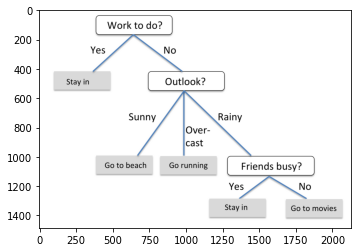

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('decision-tree.png')
imgplot = plt.imshow(img)
plt.show()

You need to load the scikit library to make decision trees.

In [10]:
from sklearn import tree

In [11]:
cols = ['Survived','Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = train[cols]
# remove Nans
df = df.dropna()
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [12]:
x = df[features]
# remove Nans
Y = df['Survived']

In [13]:
clf = tree.DecisionTreeClassifier()
clf.fit(x, Y)

DecisionTreeClassifier()

Visualize the tree

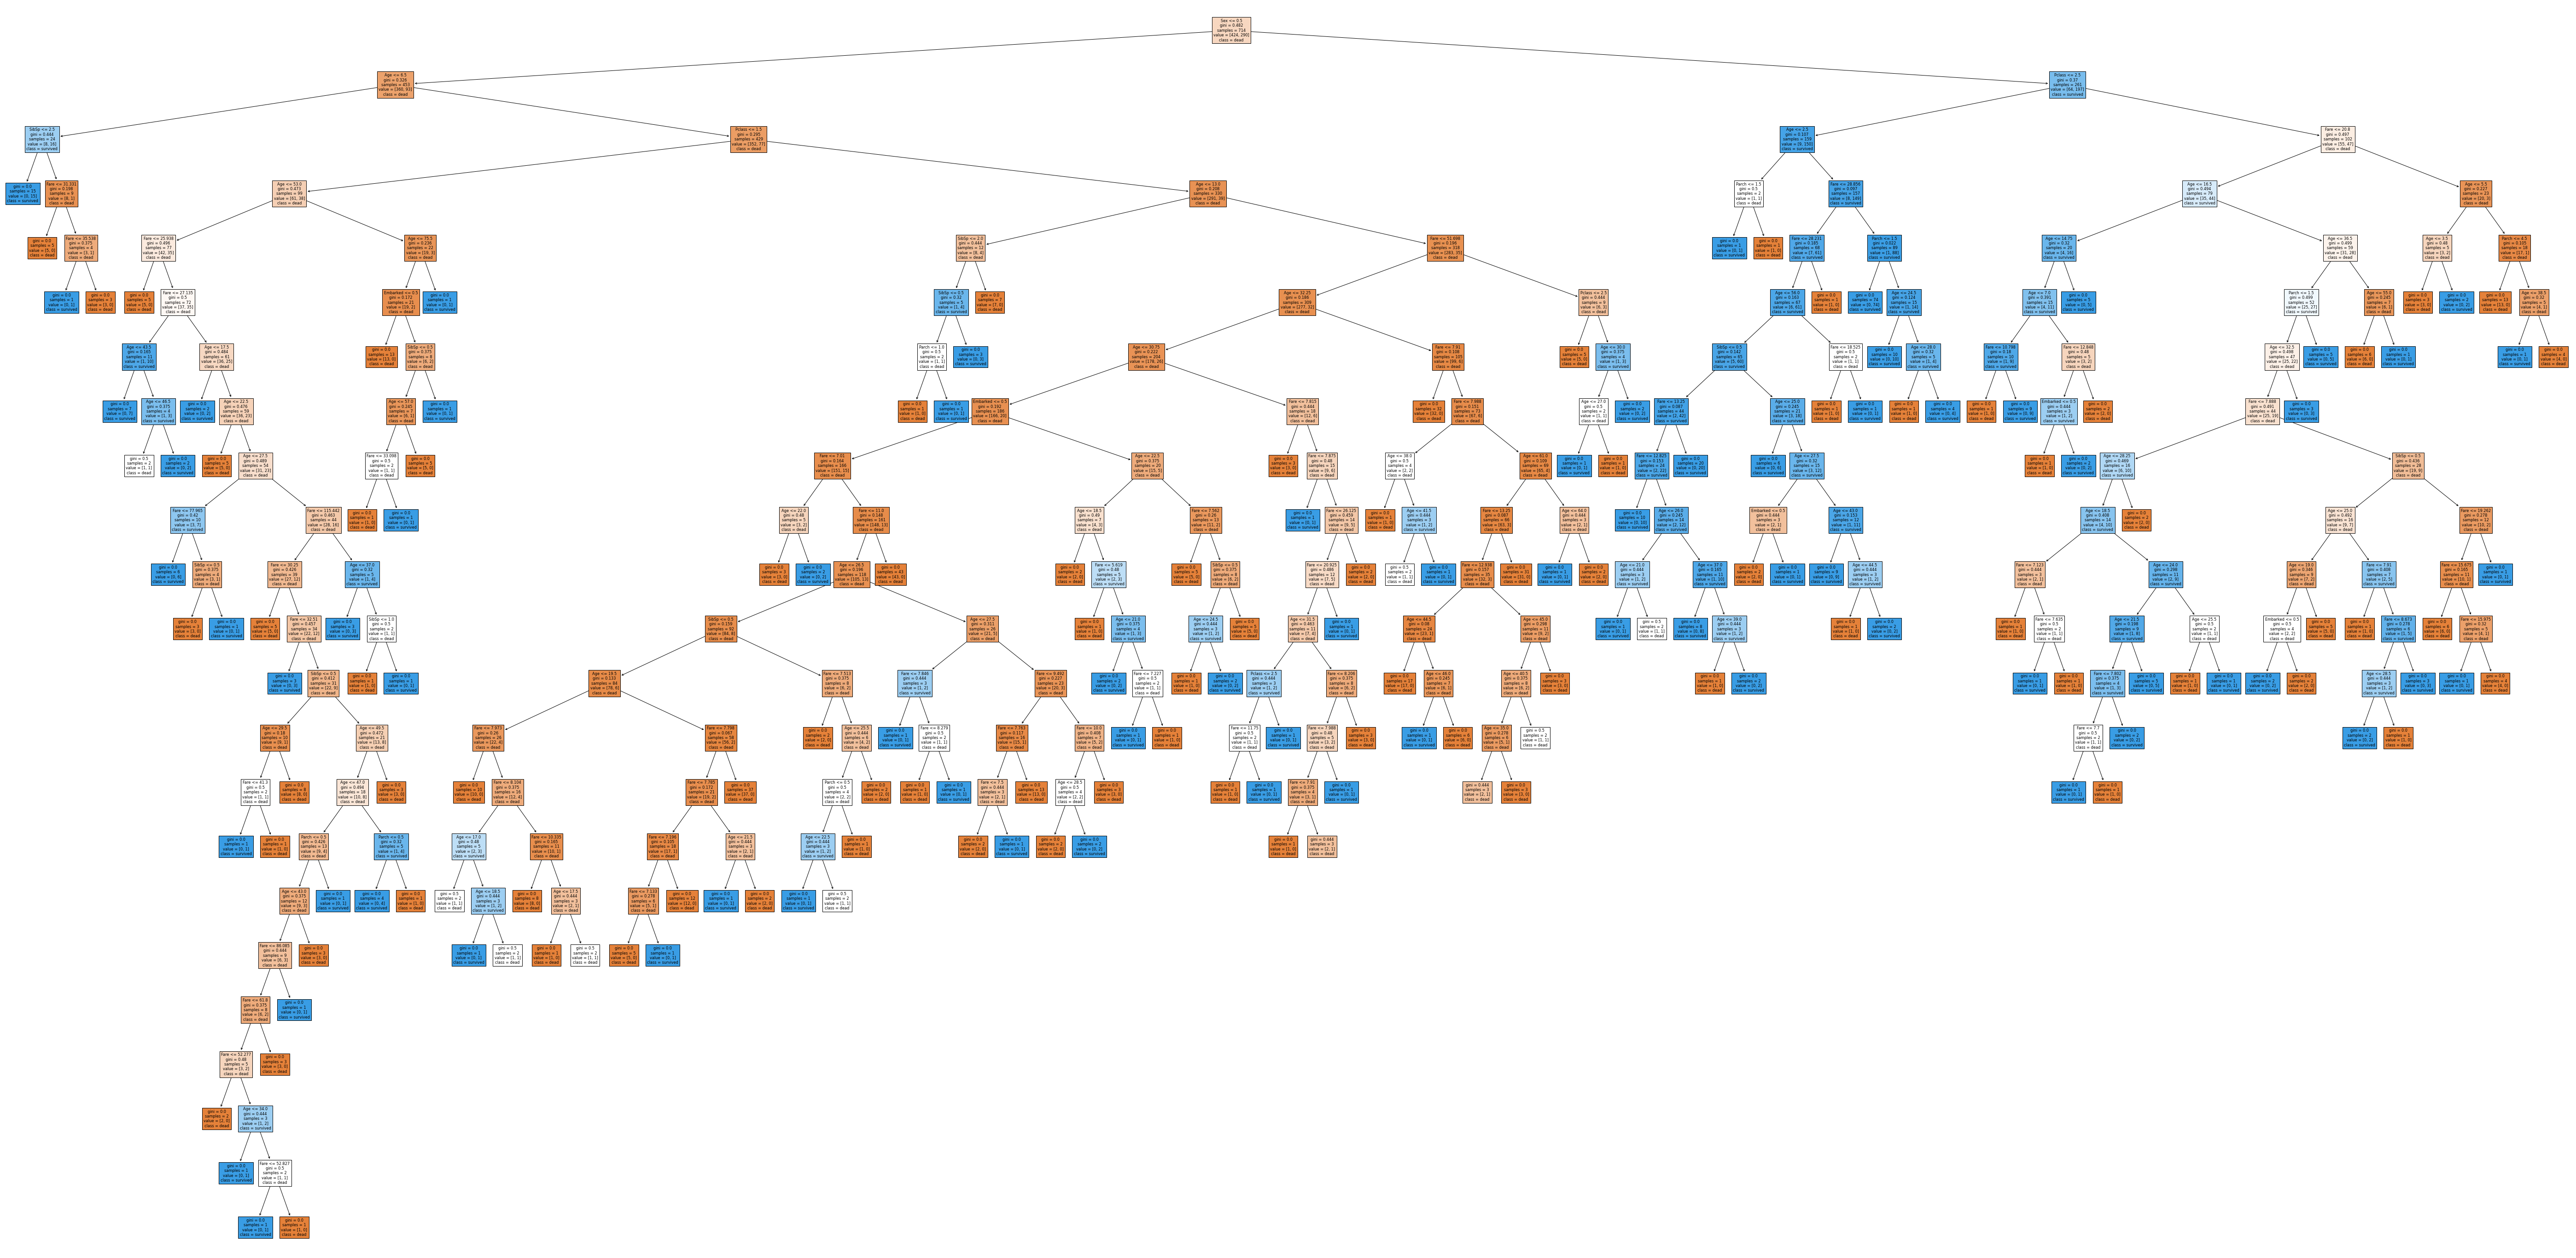

In [14]:
fig = plt.figure(figsize=(100,50))

class_names = ['dead', 'survived']
tree.plot_tree(clf, 
                   feature_names= features,  
                   class_names=class_names,
                   filled=True)
plt.show()

## Predicting

1. Make a prediction using titanic_tree and the test data.
2. For Kaggle: Create a data frame with two columns: PassengerId and Survived. Survived contains your predictions.
3. Check the rows of the data frame.

Please, report at the end of the class on the Kaggle process. Can you find more competitions that interest you?

To make a prediction on the test set we first have to clean it as we did with the train set

In [15]:
test['Child'] = np.where(test['Age'] <18.0, 1, 0)
test['Sex'] = np.where(test['Sex'] == 'female', 1, 0)
test['Embarked'] = np.where(test['Embarked'] == 'C', 1, 0)

In [16]:
cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df2 = test[cols]
# remove Nans
df2 = df2.dropna()

In [17]:
x_test = df2[features]

y_pred = clf.predict(x_test)

We now calculate how many were predicted to survive

In [18]:
Counter(y_pred)

Counter({0: 183, 1: 148})